### The Sparks Foundation
### Task 2 - Prediction using Unsupervised ML
### Pratyush Yadav

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
iris_data = pd.read_csv('C:/Users/Pratyush Yadav/Downloads/Iris.csv')
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
x = iris_data.drop(['Id','Species'],axis=1)
y = iris_data['Species']

### Visualizing the Initial Groups in the data

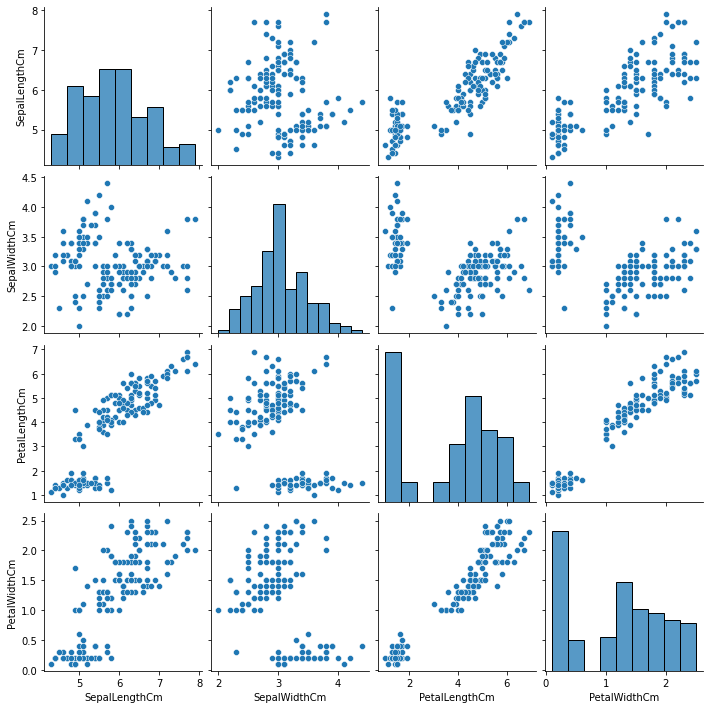

In [4]:
sns.pairplot(x) #Pairwise plots of all features in the dataset

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

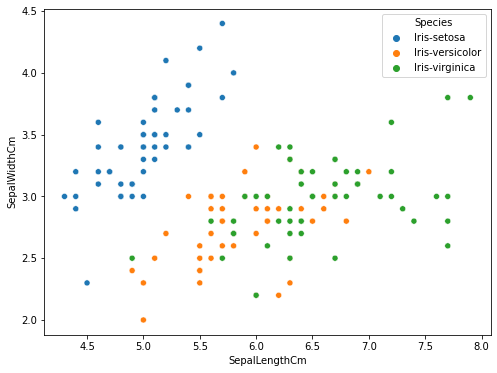

In [5]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=iris_data,hue='Species')

### Finding Optimal Value of K using the Elbow Method

<function matplotlib.pyplot.show(close=None, block=None)>

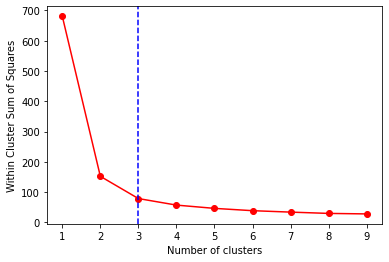

In [6]:
from sklearn.cluster import KMeans
#from sklearn.metrics import silhouette_score
SSE=[]
for n_cluster in range(1,10):
    kmeans = KMeans(n_clusters = n_cluster, init='k-means++', random_state=100, tol=1e-04)
    kmeans.fit(x)
    SSE.append(kmeans.inertia_)
    
plt.figure(figsize=(6,4))
plt.plot(range(1,10), SSE, color='red', marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squares')

elbow_cut = 3
plt.axvline(x=elbow_cut,color='blue',linestyle='--')
plt.show

From the <b>elbow plot</b> above we can see that there after <b>K=3</b>, the graph is almost linear, which indicates that the optimal number of clusters should be 3. We can demonstrate this visually as well.

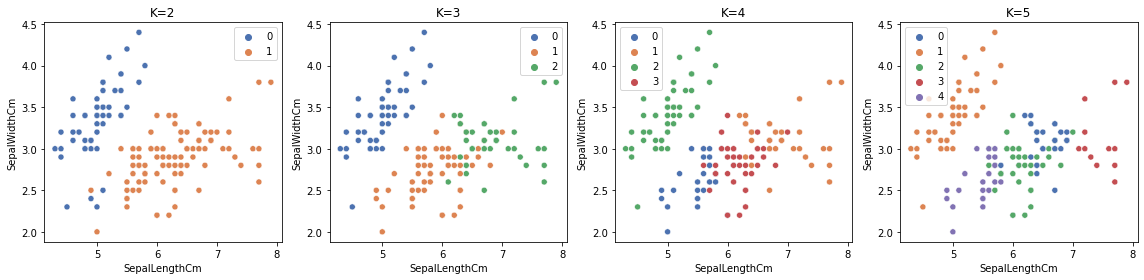

In [7]:
plt.figure(figsize=(16,4))
for k in range(2,6):
    kmeans = KMeans(n_clusters=k, init='k-means++',random_state=100)
    cluster_labels = kmeans.fit_predict(x)
    plt.subplot(1,4,k-1)
    sns.scatterplot(x=iris_data['SepalLengthCm'],y=iris_data['SepalWidthCm'],hue=cluster_labels, palette='deep')
    plt.title('K='+str(k))
plt.tight_layout()
plt.show()

From the above diagrams, the following inferences can be made:

1. At K=2, the one of the three classes is clustered correctly, while the other two classes are grouped together. 
2. At K=3, we see three different clusters which is very similar to the distribution of points in the original data as well
3. At K=4, 5, it can be seen that the existing groups are further being split into clusters, which is a departure from the natural grouping

Thus, 3 clusters seem to be an optimal choice. 

Text(0.5, 1.0, 'Clustering Results')

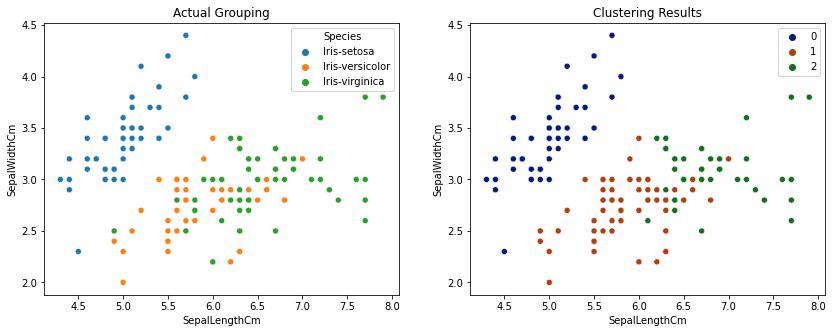

In [8]:
#Final Model
km = KMeans(n_clusters=3, init='k-means++', random_state=100)
km.fit(x)

new_labels = km.labels_

#Comparing the initial groups and the clustering results

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.scatterplot(x=iris_data['SepalLengthCm'],y=iris_data['SepalWidthCm'],hue=iris_data['Species'])
plt.title('Actual Grouping')

plt.subplot(1,2,2)
sns.scatterplot(x=iris_data['SepalLengthCm'],y=iris_data['SepalWidthCm'],hue=new_labels, palette='dark')
plt.title('Clustering Results')